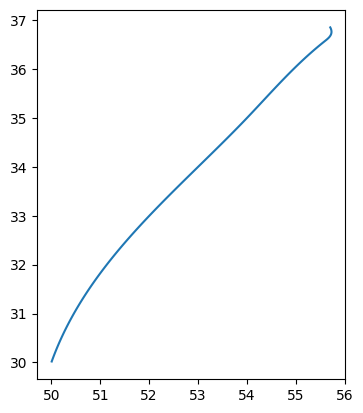

In [40]:
import geopandas as gpd
from shapely.geometry import LineString, Point
from scipy.interpolate import splprep, splev
import numpy as np
import matplotlib.pyplot as plt

# Sample points

def splines(_points):    
    # Fit spline through points
    tck, _ = splprep(np.array(_points).T, s=0.0)
    
    # Evaluate spline at a higher resolution
    u_new = np.linspace(0, 1, 1000)
    spline_points = splev(u_new, tck)

    tck, _ = splprep([x, y], s=0.0)

    
    # Convert spline points to Shapely Point objects
    point_geoms = [Point(x, y) for x, y in zip(*spline_points)]
    
    # Create a LineString from the interpolated points
    line = LineString(point_geoms)
    
    # Create a GeoDataFrame with the LineString
    gdf = gpd.GeoDataFrame(geometry=[line])

    return gdf



points = [(0.1, 0.2), (1.9, 1.9), (2.5, 0.5), (3.7, 1.7), (4, 0)]

points = [(54, 35), (55.586, 36.567), (55.703, 36.679), (55.693, 36.871)]

points = [(50., 30. ), (53., 34.), (54., 35.), (55.585876, 36.566525), (55.703134, 36.679394), (55.692896, 36.87081)]

#points = [(30, 10),(35, 15), (55.58, 36.56), (55.70, 36.67), (55.69, 36.87)]
gdf_spline = splines(points)

fig, ax = plt.subplots()
gdf_spline.plot(ax=ax)
plt.show()


(array('d', [2.5223986160726118e-17, 0.004004004004004027, 0.008008008008008027, 0.01201201201201203, 0.01601601601601603, 0.020020020020020034, 0.024024024024024038, 0.02802802802802804, 0.03203203203203203, 0.036036036036036036, 0.04004004004004005, 0.04404404404404405, 0.048048048048048055, 0.052052052052052045, 0.05605605605605604, 0.06006006006006005, 0.06406406406406405, 0.06806806806806805, 0.07207207207207206, 0.07607607607607605, 0.08008008008008005, 0.08408408408408408, 0.08808808808808806, 0.09209209209209208, 0.09609609609609605, 0.10010010010010005, 0.10410410410410406, 0.1081081081081081, 0.11211211211211207, 0.11611611611611608, 0.1201201201201201, 0.12412412412412409, 0.12812812812812807, 0.13213213213213207, 0.13613613613613607, 0.1401401401401401, 0.14414414414414406, 0.14814814814814808, 0.1521521521521521, 0.15615615615615613, 0.1601601601601601, 0.16416416416416407, 0.1681681681681681, 0.1721721721721721, 0.17617617617617612, 0.18018018018018014, 0.1841841841841841

ValueError: not enough values to unpack (expected 3, got 2)

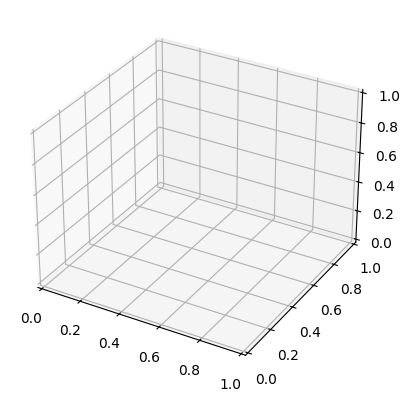

In [7]:
import geopandas as gpd
from shapely.geometry import LineString, Point
from scipy.interpolate import splprep, splev
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample points with z-coordinate
points = [(0, 0, 0), (1, 1, 1), (2, 0, 2), (3, 1, 3), (4, 0, 4)]

# Convert points to numpy array
points_array = np.array(points)

# Fit spline through points
tck, _ = splprep(points_array.T, s=0.0)

# Evaluate spline at a higher resolution
u_new = np.linspace(0, 1, 1000)
spline_points = splev(u_new, tck)

# Create a LineString from the interpolated points
line = LineString(zip(*spline_points))

# Create a GeoDataFrame with the LineString
gdf = gpd.GeoDataFrame(geometry=[line])

# Plotting in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates for 3D plotting
print(line.xy)
x_coords, y_coords, z_coords = line.xy
ax.plot(x_coords, y_coords, z_coords)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Curve through Points')

plt.show()
